In [1]:
!pip install matplotlib pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [2]:
import torch
import pytorch_lightning as pl
from torchvision.utils import save_image
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# Import model classes from your classifierfree module.
from models.classifierfree import CombinedConditioningUNet, DiffusionModel

def get_dataloader(batch_size=128):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda t: (t - 0.5) * 2)  # Scale images to [-1, 1]
    ])
    dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

if __name__ == '__main__':
    unet = CombinedConditioningUNet(
        in_channels=1,
        base_channels=64,
        time_emb_dim=128,
        num_classes=10,
        class_emb_dim=32,
        attn_emb_dim=64
    )

    diffusion = DiffusionModel(
        unet,
        timesteps=1000,
        beta_start=1e-4,
        beta_end=0.02,
        lr=2e-4,
        drop_prob=0.1
    )

    trainer = pl.Trainer(
        max_epochs=30,
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        devices=1 if torch.cuda.is_available() else None
    )

    dataloader = get_dataloader(batch_size=128)

    trainer.fit(diffusion, dataloader)

    # Generate samples with classifier-free guidance.
    samples = diffusion.sample(num_samples=16, ddim_steps=50, desired_class=7, guidance_scale=5.0)
    save_image(samples, "classifierfree_ddim_samples.png", nrow=4, normalize=True)

    print("Sampling complete. Check 'classifierfree_ddim_samples.png' for generated images.")


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 43.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.16MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.96MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                     | Params | Mode 
-----------------------------------------------------------
0 | model | CombinedConditioningUNet | 4.1 M  | train
-----------------------------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.549    Total estimated model params size (MB)
57        Modules in train mode
0         Modules in eval mode
/usr/local/lib/python3.11/dist-packages/py

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


Sampling complete. Check 'combined_conditioning_ddim_samples.png' for generated images.


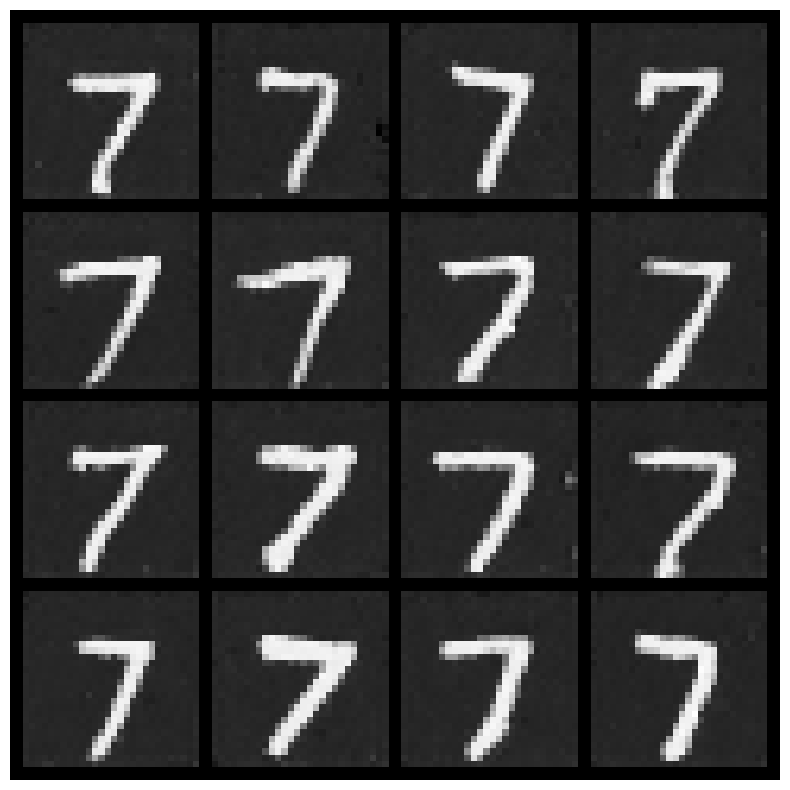

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
img_pil = Image.open("/content/combined_conditioning_ddim_samples.png")
plt.imshow(img_pil)
plt.axis('off')
plt.show()